# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Métricas

In [2]:
#Error medio absoluto

def mae(df):

    ac = []

    for i in range(len(df.iloc[:,0])):

        v = np.abs(df.iloc[i,1]-df.iloc[i,0])

        ac.append(v)

    mae = np.sum(ac)/len(ac)

    return mae

#Eficiencia Nash-Sutcliffe

def nse(df):

    ac1 = []
    ac2 = []


    for i in range(len(df.iloc[:,0])):

        v1 = (df.iloc[i,0]-df.iloc[i,1])**2
        v2 = (df.iloc[i,0]-df.iloc[:,0].mean())**2
        ac1.append(v1)
        ac2.append(v2)

    nse = 1 - (np.sum(ac1)/np.sum(ac2))

    return nse

#Raíz del error cuadrático medio:

def rmse(df):

    ac = []

    for i in range(len(df.iloc[:,0])):

        v = (df.iloc[i,1]-df.iloc[i,0])**2

        ac.append(v)

    rmse = np.sqrt(np.sum(ac)/len(ac))

    return rmse

#Coeficiente de correlación:

def r(df):

    ac1 = []
    ac2 = []
    ac3 = []

    for i in range(len(df.iloc[:,0])):

        v1 = (df.iloc[i,0]-df.iloc[:,0].mean())*(df.iloc[i,1]-df.iloc[:,1].mean())
        v2 = (df.iloc[i,0]-df.iloc[:,0].mean())**2
        v3 = (df.iloc[i,1]-df.iloc[:,1].mean())**2
        ac1.append(v1)
        ac2.append(v2)
        ac3.append(v3)

    r = np.sum(ac1) / np.sqrt((np.sum(ac2)*np.sum(ac3)))

    return r

"""
Nota: En el dataset la posición df.iloc[:,0] es el valor predicho
y la posición df.iloc[:,1] es el valor observado por lo que debe ir de la
siguiente manera df["Predicción","Observado"]
"""

'\nNota: En el dataset la posición df.iloc[:,0] es el valor predicho\ny la posición df.iloc[:,1] es el valor observado por lo que debe ir de la\nsiguiente manera df["Predicción","Observado"]\n'

# Base de datos completa

In [3]:
df = pd.read_excel("C:/Users/ferna/TESIS/calera_completo.xlsx")

df.head()

,AÑO,MES,T_MEDIA_MAX,T_MED_MIN,T_MEDIA,PRECIP,HR_MED_MAX,HR_MED_MIN,HR_MEDIA,RADIACION,...,Pres_sat_max,Pres_sat_min,Pres_sat_med,Pres_real_de_vapor,Pres_media_de_vapor,Pend_curva,Deficit_de_presion,Dias_del_mes,Horas_luz,EVAP
0,2002,1,19.6,2.1,10.8,13.1,78.1,24.6,50.4,598357.8,...,2.281006,0.710707,1.295364,0.652863,1.166400,0.086240,0.513537,31,10.926,155.2
1,2002,2,21.9,3.7,12.9,18.6,71.6,19.7,43.1,663136.9,...,2.627859,0.796248,1.488002,0.641329,1.339827,0.097409,0.698498,28,11.342,172.3
2,2002,3,24.1,5.1,15.1,10.7,61.3,15.3,34.8,843493.4,...,3.001875,0.878419,1.716356,0.597292,1.526835,0.110408,0.929543,31,12.000,235.1
3,2002,4,27.4,9.8,19.4,2.4,62.2,14.3,34.7,920845.6,...,3.649868,1.211602,2.252831,0.781732,1.850831,0.140103,1.069099,30,12.716,257.0
4,2002,5,28.8,12.7,20.9,40.6,73.0,15.7,41.6,977664.8,...,3.959613,1.468630,2.471770,1.028256,2.005704,0.151938,0.977447,31,13.274,228.0


# Base de datos de parámetros climatológicos

In [4]:
df = df.drop(columns=["AÑO","MES"],axis=1)

df.head()

,T_MEDIA_MAX,T_MED_MIN,T_MEDIA,PRECIP,HR_MED_MAX,HR_MED_MIN,HR_MEDIA,RADIACION,V_V_MED_MAX,V_V_MEDIA,...,Pres_sat_max,Pres_sat_min,Pres_sat_med,Pres_real_de_vapor,Pres_media_de_vapor,Pend_curva,Deficit_de_presion,Dias_del_mes,Horas_luz,EVAP
0,19.6,2.1,10.8,13.1,78.1,24.6,50.4,598357.8,20.5,9.1,...,2.281006,0.710707,1.295364,0.652863,1.166400,0.086240,0.513537,31,10.926,155.2
1,21.9,3.7,12.9,18.6,71.6,19.7,43.1,663136.9,22.3,10.4,...,2.627859,0.796248,1.488002,0.641329,1.339827,0.097409,0.698498,28,11.342,172.3
2,24.1,5.1,15.1,10.7,61.3,15.3,34.8,843493.4,23.1,10.6,...,3.001875,0.878419,1.716356,0.597292,1.526835,0.110408,0.929543,31,12.000,235.1
3,27.4,9.8,19.4,2.4,62.2,14.3,34.7,920845.6,22.7,9.0,...,3.649868,1.211602,2.252831,0.781732,1.850831,0.140103,1.069099,30,12.716,257.0
4,28.8,12.7,20.9,40.6,73.0,15.7,41.6,977664.8,23.2,8.3,...,3.959613,1.468630,2.471770,1.028256,2.005704,0.151938,0.977447,31,13.274,228.0


# Gráfico del periodo de registro completo

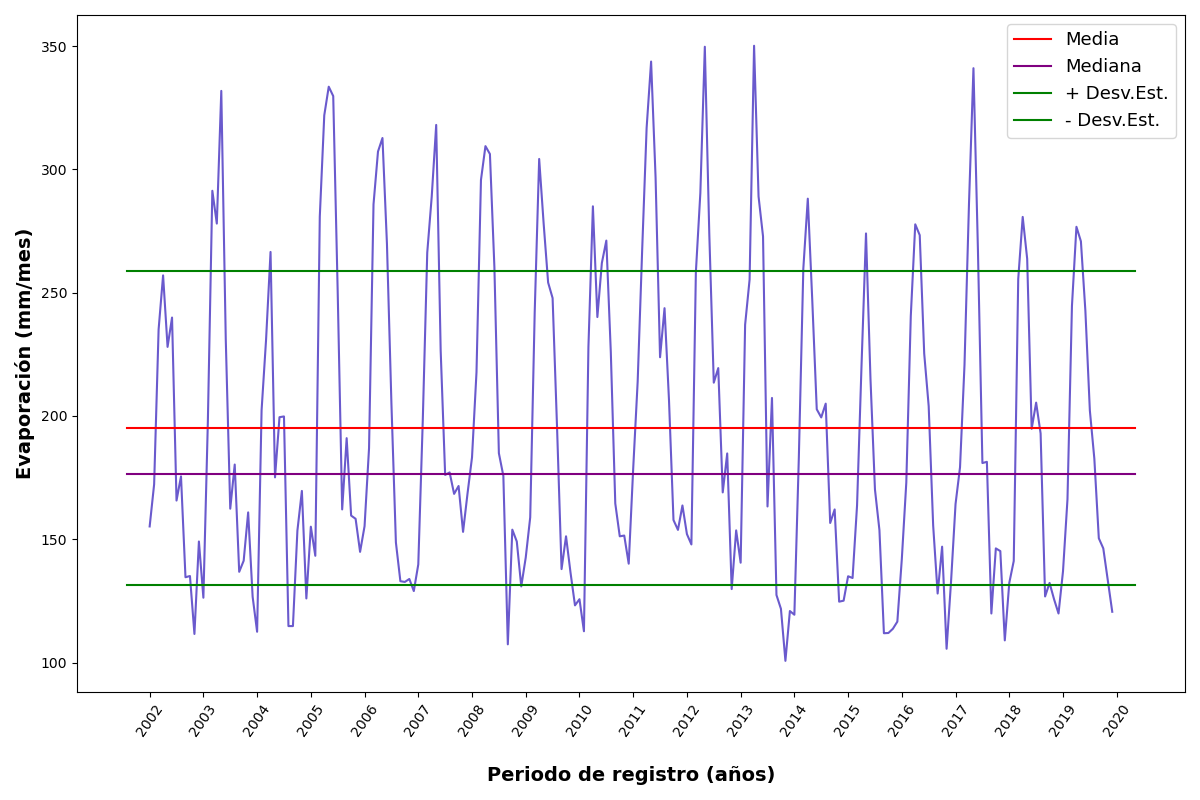

In [6]:
%matplotlib widget

x = np.linspace(-5,220,210)
x = x.reshape(len(x),1)

y_media = np.array([df["EVAP"].mean()])
y_media = np.tile(y_media,len(x))

y_median = np.array([df["EVAP"].median()])
y_median = np.tile(y_median,len(x))

y_de1 = np.array([df["EVAP"].mean()+df["EVAP"].std()])
y_de1 = np.tile(y_de1,len(x))

y_de2 = np.array([df["EVAP"].mean()-df["EVAP"].std()])
y_de2 = np.tile(y_de2,len(x))

fig = plt.figure(figsize=(12,8))

#plt.title("Evaporación estación: Calera")

plt.plot(df["EVAP"], color="slateblue")
plt.plot(x,y_media, color="red", label = "Media")
plt.plot(x,y_median, color="purple", label = "Mediana")
plt.plot(x,y_de1, color="green", label = "+ Desv.Est.")
plt.plot(x,y_de2, color="green", label = "- Desv.Est.")
plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=14)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=14)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.legend(loc="best",fontsize=13)

#plt.grid()

#plt.savefig("estacion_calera.png", bbox_inches="tight")

plt.show()

# Nueva base de datos donde estarán los modelos realizados

In [6]:
modelos = pd.DataFrame(data=np.array(df.iloc[:,23]),columns=["Tanque"])

modelos

,Tanque
0,155.2
1,172.3
2,235.1
3,257.0
4,228.0
...,...
211,182.7
212,150.4
213,146.3
214,133.6


In [9]:
df.iloc[:,12]

0      2.45
1      2.45
2      2.45
3      2.45
4      2.45
       ... 
211    2.45
212    2.45
213    2.45
214    2.45
215    2.45
Name: Cal_lat_vapor, Length: 216, dtype: float64

# Stephens Stewart

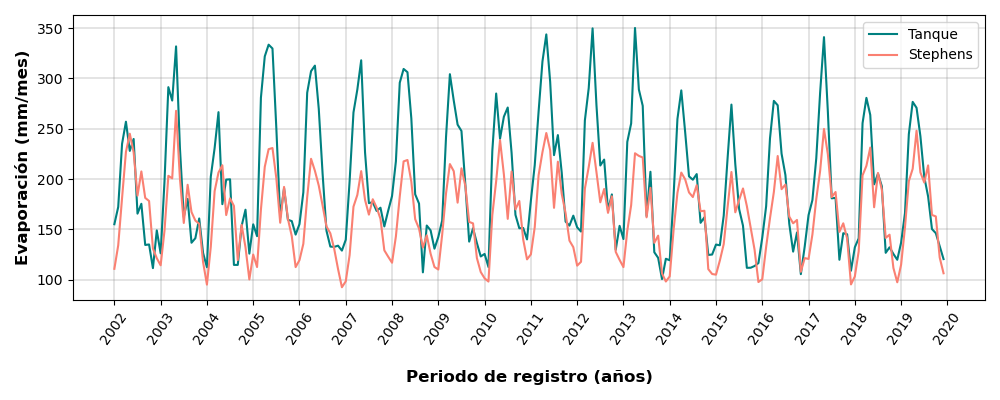

In [7]:
rad = ((df.iloc[:,7] / df.iloc[:,21] ) / df.iloc[:,22]) / 4

stephens = (0.0082* (df.iloc[:,2]*(9/5)+32) - 0.19)*(rad*0.03495) * df.iloc[:,21]

modelos["Stephens"] = stephens 

%matplotlib widget

fig = plt.figure(figsize=(10,4))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Stephens"],c="salmon",label="Stephens")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("cal_tan_steph.png", bbox_inches="tight")

plt.show()

In [8]:
print("R:")

print(r(modelos[["Stephens","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Stephens","Tanque"]]))

print("MAE:")

print(mae(modelos[["Stephens","Tanque"]]))

print("NSE:")

print(nse(modelos[["Stephens","Tanque"]]))

R:
0.8215608663743931
RMSE:
48.4138058758994
MAE:
37.826946412374824
NSE:
-0.455478832435424


# Makkink

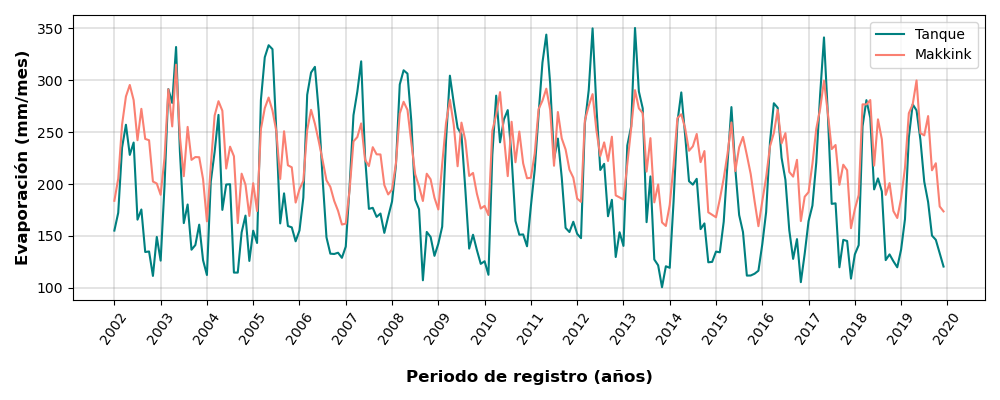

In [7]:
rad = ((df.iloc[:,7] / df.iloc[:,21] ) / df.iloc[:,22]) / 4

makkink = ((0.61*(df.iloc[:,19]*1000/(df.iloc[:,19]*1000+df.iloc[:,13]*1000)) * rad) - 0.12) \
            * (3.6/(df.iloc[:,12]*1000)) * 24 * df.iloc[:,21]

modelos["Makkink"] = makkink


%matplotlib widget

fig = plt.figure(figsize=(10,4))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Makkink"],c="salmon",label="Makkink")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("cal_tan_makk.png", bbox_inches="tight")

plt.show()

In [12]:
print("R:")

print(r(modelos[["Makkink","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Makkink","Tanque"]]))

print("MAE:")

print(mae(modelos[["Makkink","Tanque"]]))

print("NSE:")

print(nse(modelos[["Makkink","Tanque"]]))

R:
0.8437692446181055
RMSE:
49.288592031228035
MAE:
42.764411319240146
NSE:
-0.8642596464572323


# Linacre

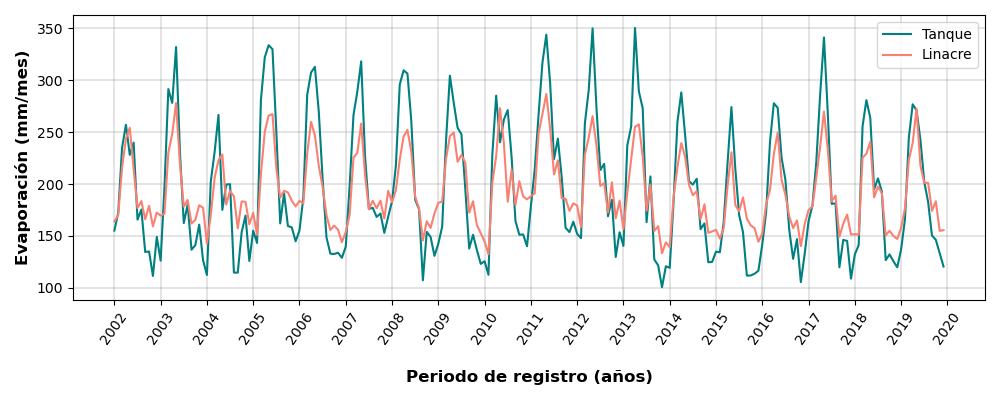

In [13]:
linacre = ((((700*(df.iloc[:,2]+0.006*2192))/(100-22.9))+15*(df.iloc[:,2]-(df.iloc[:,2]-((100-df.iloc[:,6])/5))))/(80-df.iloc[:,2]) * df.iloc[:,21])

modelos["Linacre"] = linacre


%matplotlib widget

fig = plt.figure(figsize=(10,4))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Linacre"],c="salmon",label="Linacre")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("cal_tan_lina.png", bbox_inches="tight")

plt.show()

In [14]:
print("R:")

print(r(modelos[["Linacre","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Linacre","Tanque"]]))

print("MAE:")

print(mae(modelos[["Linacre","Tanque"]]))

print("NSE:")

print(nse(modelos[["Linacre","Tanque"]]))

R:
0.9319129962274184
RMSE:
33.56524632734697
MAE:
28.095648804711935
NSE:
0.06738810456309585


# Romanenko

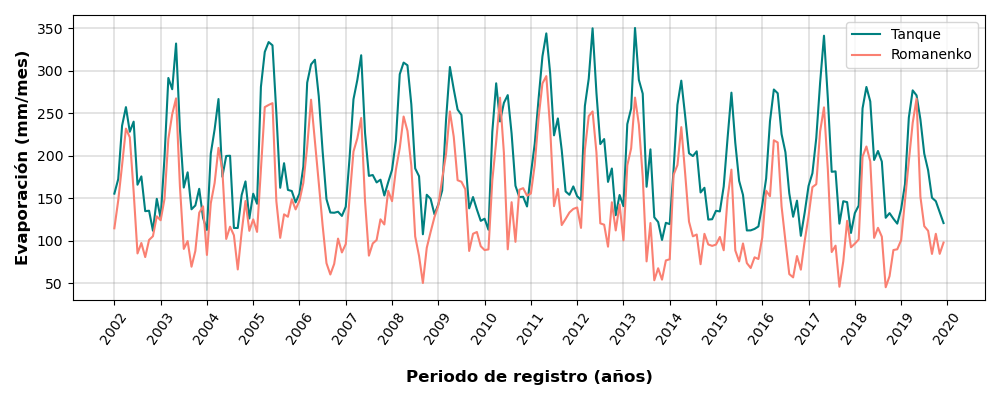

In [15]:
rom = 0.0018*((25+df.iloc[:,2])**2)*(100-df.iloc[:,6])

modelos["Romanenko"] = rom

%matplotlib widget

fig = plt.figure(figsize=(10,4))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Romanenko"],c="salmon",label="Romanenko")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("cal_tan_roman.png", bbox_inches="tight")

plt.show()

In [16]:
print("R:")

print(r(modelos[["Romanenko","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Romanenko","Tanque"]]))

print("MAE:")

print(mae(modelos[["Romanenko","Tanque"]]))

print("NSE:")

print(nse(modelos[["Romanenko","Tanque"]]))

R:
0.8805456409963353
RMSE:
61.42662244199038
MAE:
54.38187647037038
NSE:
-0.10656919821003541


In [17]:
modelos.corr()

,Tanque,Stephens,Makkink,Linacre,Romanenko
Tanque,1.000000,0.821561,0.843769,0.931913,0.880546
Stephens,0.821561,1.000000,0.962348,0.882677,0.670575
Makkink,0.843769,0.962348,1.000000,0.892568,0.754069
Linacre,0.931913,0.882677,0.892568,1.000000,0.916145
Romanenko,0.880546,0.670575,0.754069,0.916145,1.000000


# Modelos de regresión lineal

## Stephens Stewart

In [18]:
x = modelos["Stephens"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 1.299x -19.521
0.6749622571578415


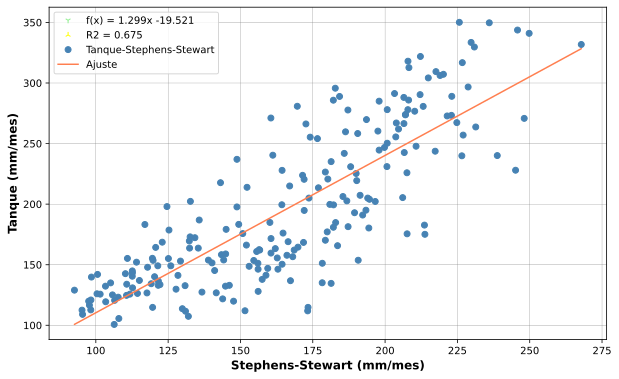

In [22]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Stephens-Stewart",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Stephens-Stewart (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

#plt.savefig("cal_tan_steph_corr.png", bbox_inches="tight")

plt.show()

## Makkink

In [23]:
x = modelos["Makkink"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 1.483x -140.323
0.7119465381634101


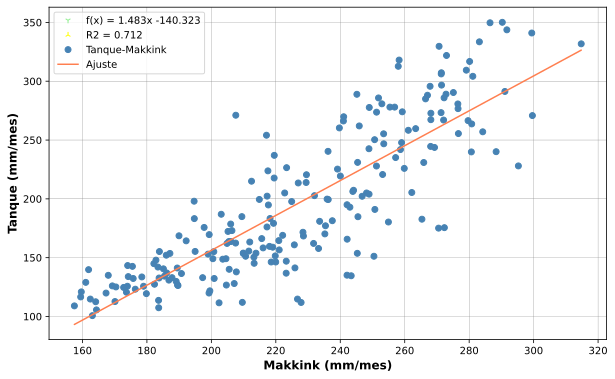

In [25]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Makkink",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Makkink (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

#plt.savefig("cal_tan_makk_corr.png", bbox_inches="tight")

plt.show()

## Linacre

In [26]:
x = modelos["Linacre"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 1.701x -133.563
0.8684618325375596


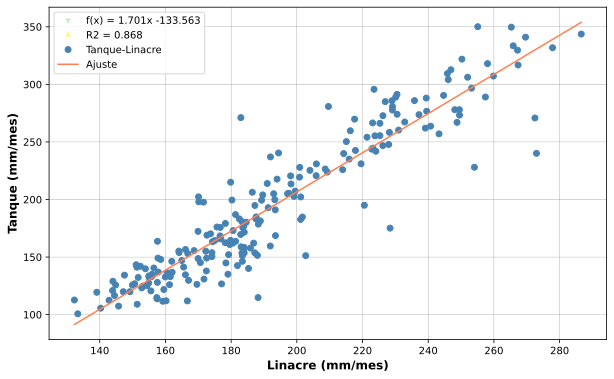

In [28]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Linacre",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Linacre (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

#plt.savefig("cal_tan_lina_corr.png", bbox_inches="tight")

plt.show()

## Romanenko

In [29]:
x = modelos["Romanenko"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x + {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 0.957x + 59.646
0.7753606258776462


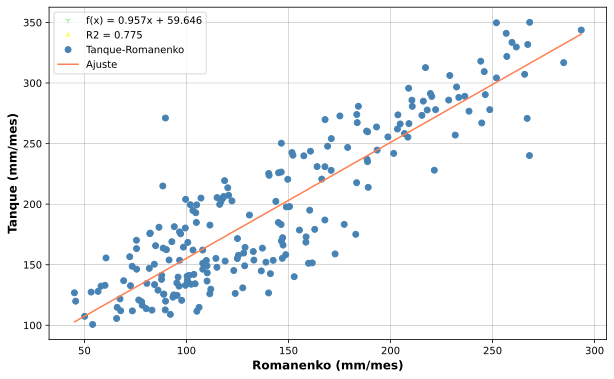

In [30]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x + {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Romanenko",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Romanenko (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("cal_tan_roman_corr.png", bbox_inches="tight")

plt.show()